<h1>Stock Analysis</h1>
Here, we have stock data from four tech companies.

Dataset has following columns:
<ul>
    <li>Time: The date and time of the day</li>
    <li>Open: The price of the stock at the start of the day when the market opens</li>
    <li>High: The highest price of the stock on that day</li>
    <li>Low: The lowest price of the stock on that day</li>
    <li>Close: The price of the stock at the end of the day when the market closes</li>
    <li>Volume: The number of stocks traded that day</li>
</ul>

In [1]:
import pandas as pd

sys = pd.read_csv('SYS.csv') 
sys.head(5)

,Time,Open,High,Low,Close,Volume
0,"Jan 1, 2018",75.50,75.5,75.00,75.00,4000
1,"Jan 2, 2018",74.85,76.0,73.11,75.32,197500
2,"Jan 3, 2018",74.03,74.6,72.30,72.75,21000
3,"Jan 4, 2018",71.03,74.5,71.03,74.01,381500
4,"Jan 5, 2018",74.35,77.0,71.00,76.52,180500


In [2]:
sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    243 non-null    object 
 1   Open    243 non-null    float64
 2   High    243 non-null    float64
 3   Low     243 non-null    float64
 4   Close   243 non-null    float64
 5   Volume  243 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.5+ KB


Here, we correct the data types such as changing Time into date format<br>
and setting it as a index of the dataset

In [3]:
sys['Time'] = pd.to_datetime(sys['Time']) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index
sys.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    243 non-null    float64
 1   High    243 non-null    float64
 2   Low     243 non-null    float64
 3   Close   243 non-null    float64
 4   Volume  243 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.4 KB


Now, let us see the close price of stock

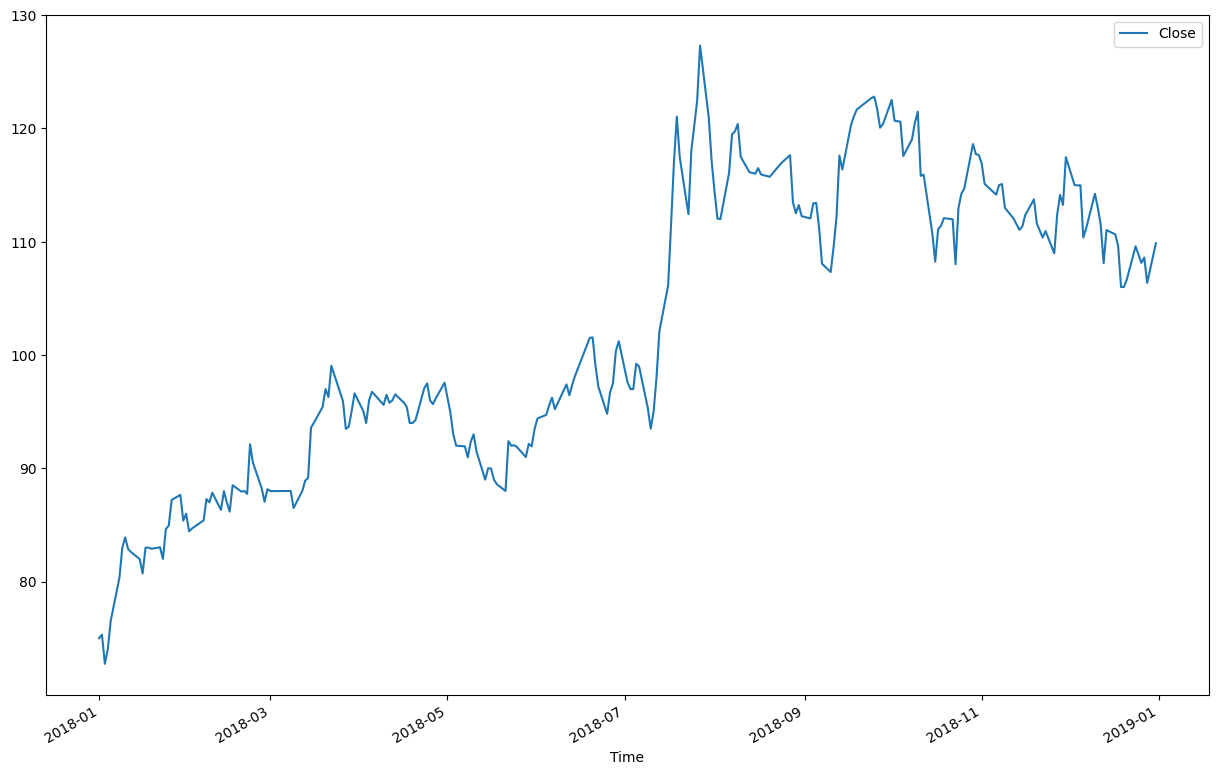

In [4]:
import matplotlib.pyplot as plt

sys['Close'].plot(legend = True, figsize=(15,10))
plt.show()

Here, X-axis represents the time frame and y-axis represents the price.<br>
We can see that the stock price is increasing for SYS<br>
However, we can observe that the graph goes up and down in random days. So, we can take average form it

In [5]:
days = 50 # Moving average window
col_name = "mv_avg for " + str(days) + " days" # New column to store moving average vlues
sys[col_name] = sys['Close'].rolling(days).mean() #Calculating moving average

<Axes: xlabel='Time'>

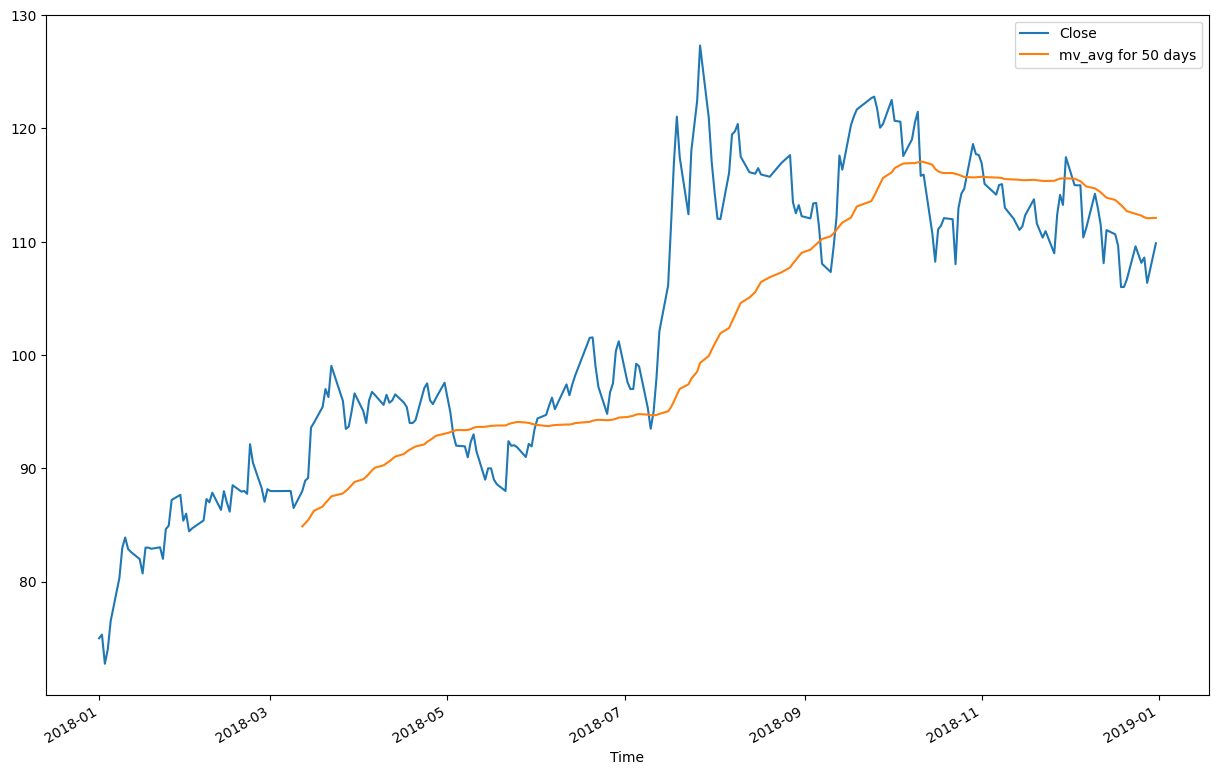

In [6]:
sys[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10)) # Plotting the closing price with moving avarage for comprison

The rolling average curve removes the fluctuations and show smooth behavior of the curve

<Axes: xlabel='Time'>

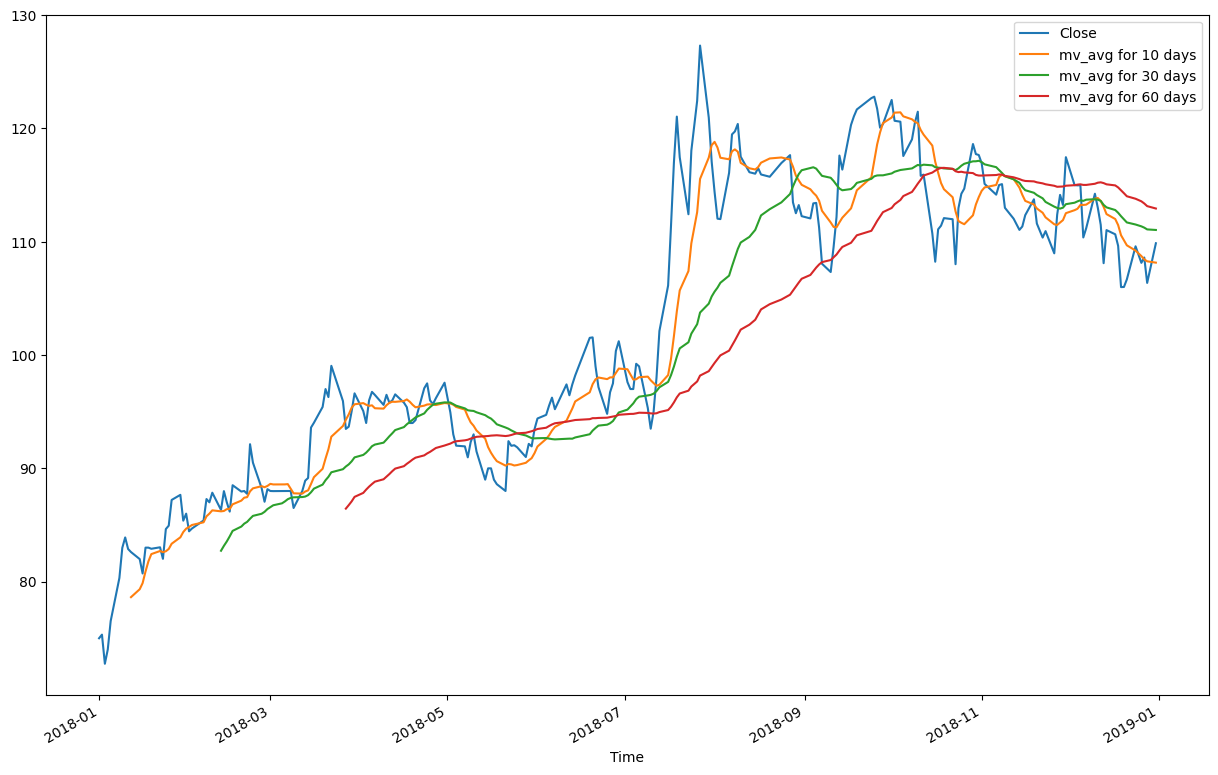

In [7]:
days = [10, 30 , 60] # Multiple number of days
for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    sys[col_name] = sys['Close'].rolling(day).mean()
    
sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize=(15,10))


With applying in increasing number of days we can see the smoothness of the curve and understand the stock trend better.

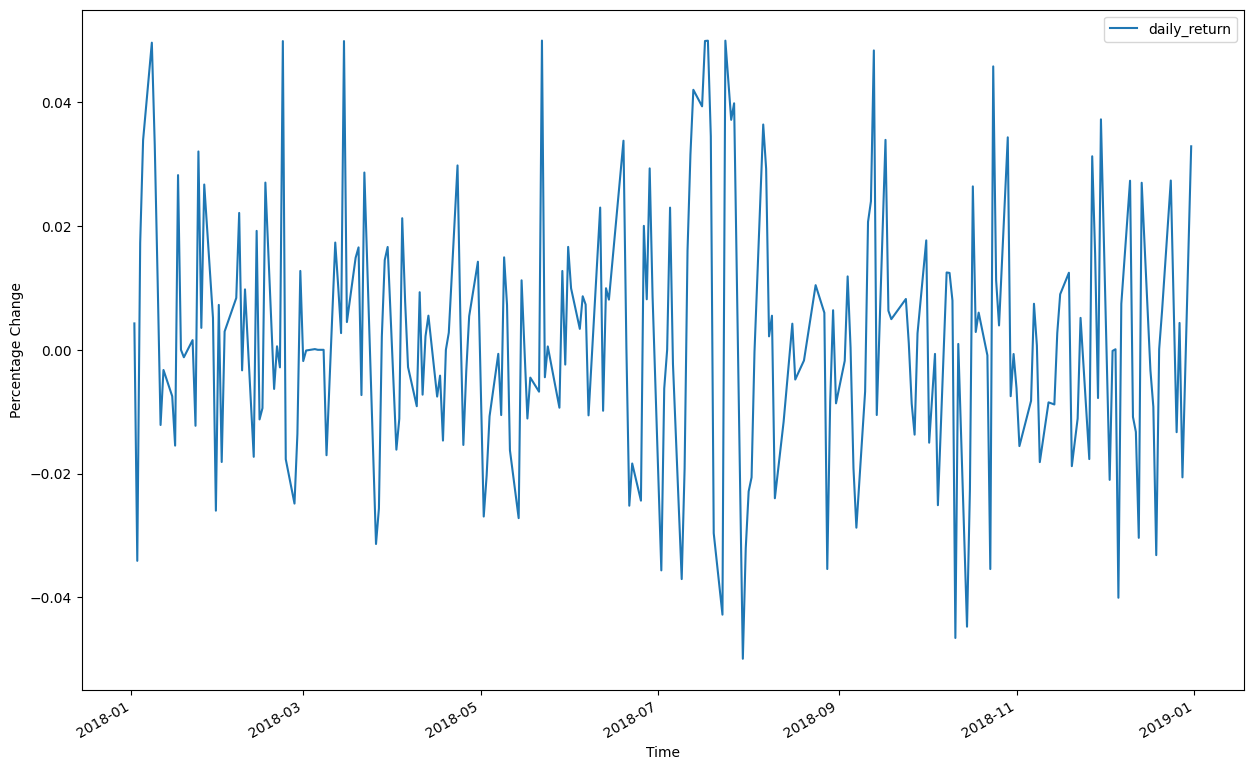

In [8]:
daily_return = sys['Close'].pct_change() # Calculate the daily returns
sys['daily_return'] = daily_return # Create new column and assign daily return values to it

sys['daily_return'].plot(legend = True, figsize=(15,10)) # plot the daily return values
plt.ylabel('Percentage Change') # Assign a name to the y-axis of plot
plt.show()

The x-axis represents the date, and the y-axis represents the percentage change in daily stock values. It can be observed that the change in daily returns is between (-0.04%, 0.04%), which is not that big of a change.
As mentioned above, the stock with minimal change is considered a stable stock. So, the SYS stock is a good stock to hold according to the daily returns.

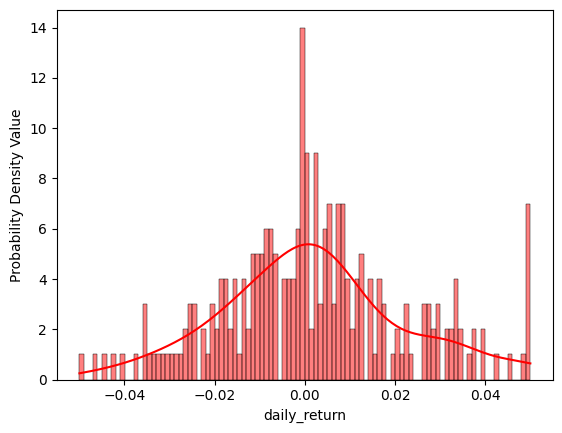

In [9]:
import seaborn as sns

sns.histplot(sys['daily_return'].dropna(), bins = 100, color = 'red', kde='daily_return') # plots a distribution graph of KDE and histogram 
plt.ylabel('Probability Density Value') # Assign a name to the y-axis of plot
plt.show()

The x-axis has daily return values. The y-axis values represent how likely the value on the x-axis occurs. The higher values mean more likelihood of a value occurring on the x-axis. <br>
The KDE plot informs us that most of the daily returns for SYS are close to zero. This tells us that the changes in price of this stock are not drastic and we can assume that SYS has a stable stock.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ns = pd.read_csv('NETSOL.csv')
ptcl = pd.read_csv('PTCL.csv')
avn = pd.read_csv('AVN.csv') 

ns['Time'] = pd.to_datetime(ns['Time'])
ptcl['Time'] = pd.to_datetime(ptcl['Time'])
avn['Time'] = pd.to_datetime(avn['Time'])

ns = ns.set_index('Time')
ptc = ptcl.set_index('Time')
avn = avn.set_index('Time')

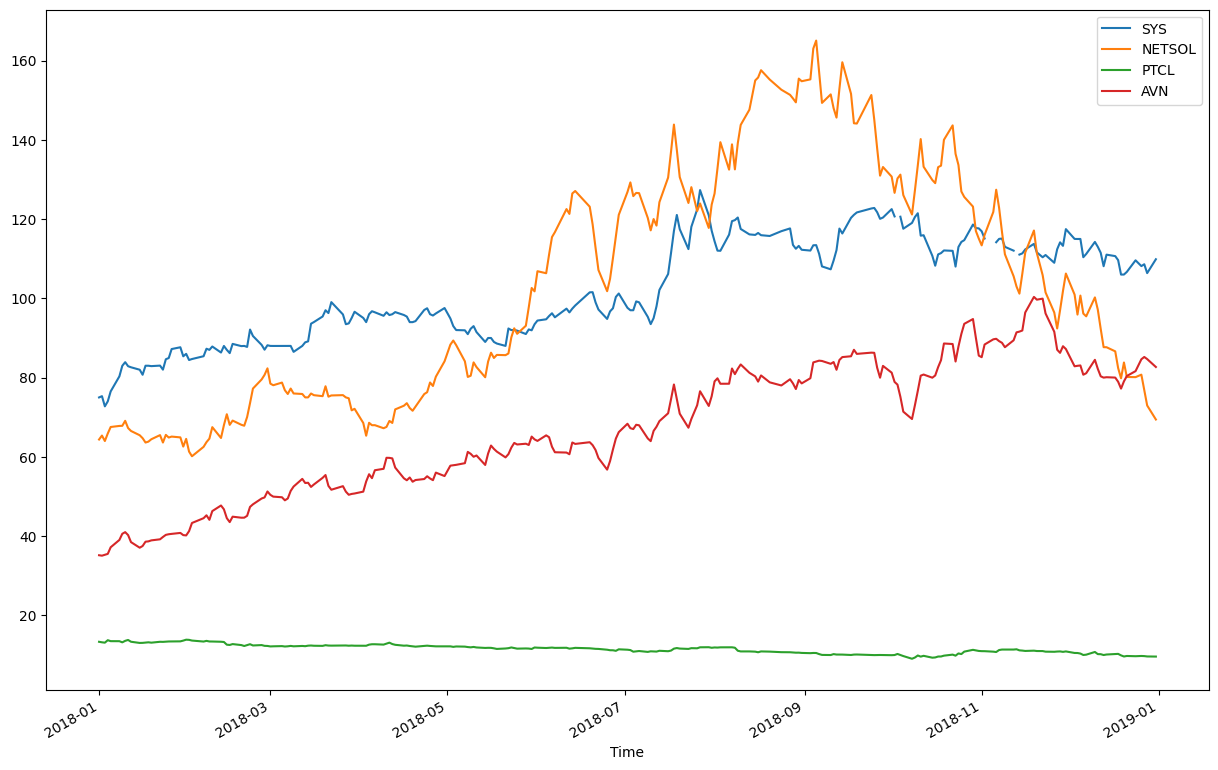

In [16]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTCL': ptc['Close'], 
                   'AVN': avn['Close']})

df.plot(legend=True, figsize=(15,10))
plt.show()

It can be seen from the comparisons of the closing price of the four companies that 2018 was not a good year for NETSOL and PTCL. The stocks of both SYS and AVN did pretty good and showed steady growth.

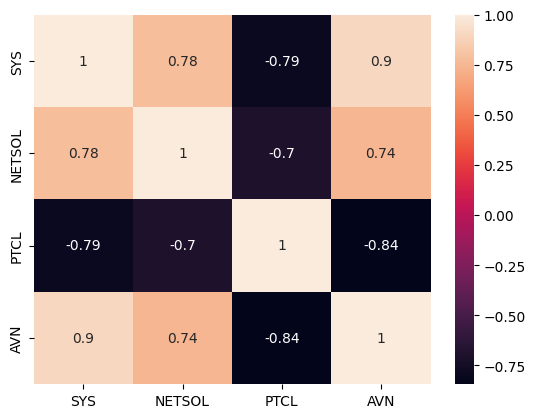

In [13]:
corr = (df.dropna()).corr()

sns.heatmap(corr, annot = True) # Plotting heatmap
plt.show()

The output shows that the correlation values of all the companies, with respect to the closing price, have been calculated against each other. Also, we can observe that the correlation of the data of a company with itself is 1. The values below zero represent negative correlation, and the values above zero represent positive correlation.

The correlation values are properly separated and easy to comprehend on a heatmap. The highest correlation value is of SYS and AVN, which is 0.9. This means that these two companies are highly correlated in a positive way. So, if the stock value of one company goes up, the value of the other company also goes up and vice versa.

In [17]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

all_returns = df.pct_change()
print(all_returns)

                 SYS    NETSOL       PTC       AVN
Time                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02  0.004267  0.015533 -0.009745 -0.003127
2018-01-03 -0.034121 -0.021107 -0.006813  0.006273
2018-01-04  0.017320  0.029688  0.047256  0.006517
2018-01-05  0.033914  0.024886 -0.017467  0.047016
...              ...       ...       ...       ...
2018-12-24  0.027372 -0.000499 -0.006148  0.015297
2018-12-26 -0.013321  0.007863  0.006186  0.036624
2018-12-27  0.004346 -0.048793 -0.003074  0.006853
2018-12-28 -0.020624 -0.049993 -0.009250 -0.006220
2018-12-31  0.032904 -0.048513 -0.003112 -0.023618

[247 rows x 4 columns]


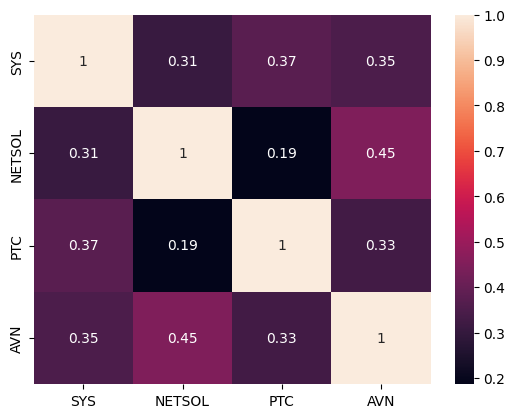

In [19]:
corr = (all_returns.dropna()).corr()
sns.heatmap(corr, annot = True)
plt.show()

From this correlation, we can infer that NETSOL and Avanceon are correlated in a positive way. Because the score is above 0.4, it is a strong correlation.

<h1>Risk Analysis</h1>

In [20]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
print("Averge daily return of companies\n", avg_daily_return)

daily_risk = ret.std() # Take standard deviation of the daily return of all companies
print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Averge daily return of companies
 SYS       0.001755
NETSOL    0.000897
PTC      -0.001173
AVN       0.003843
dtype: float64

Daily Risk or standard deviation of companies
 SYS       0.020158
NETSOL    0.034407
PTC       0.017892
AVN       0.027037
dtype: float64


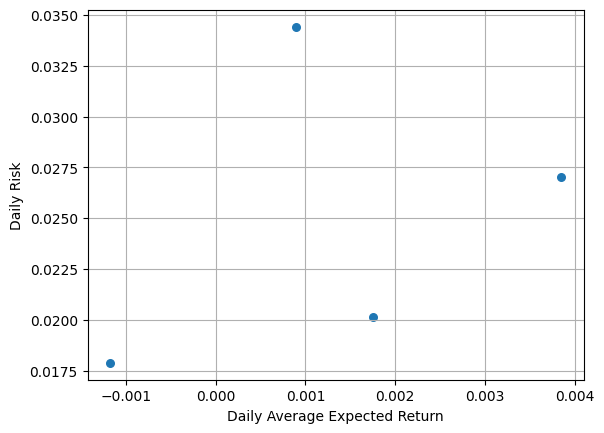

In [21]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
daily_risk = ret.std() # Take standard deviation of the daily return of all companies

plt.xlabel("Daily Average Expected Return") # Name the x-axis
plt.ylabel("Daily Risk") # Name the y-axis

plt.grid() # Add grid lines on the plot

plt.scatter(avg_daily_return, daily_risk, s = 30) # Plot the scatter plot for risk & return

In [22]:
ret = all_returns.dropna()

avg_daily_return = ret.mean()
daily_risk = ret.std()

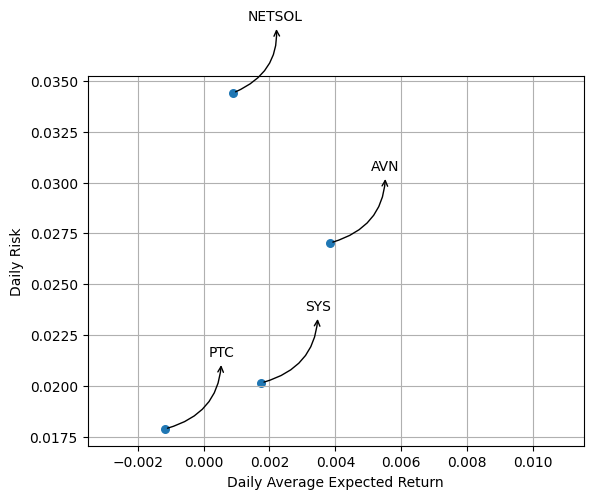

In [23]:
plt.xlabel("Daily Average Expected Return")
plt.ylabel("Daily Risk")

plt.xlim(ret.mean().min() + ret.mean().min()*2, ret.mean().max() + ret.mean().max()*2)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid()

plt.scatter(avg_daily_return, daily_risk, s = 30)
plt.show()


Now, the above plot can provide some relevant information about how much risk a particular stock holds for how much of an average return.

So, from the above graph, the following results can be inferred:
<ul>
<li>NETSOL stock has a little positive daily return and a very high risk, which means the loss is also high.</li>
<li>AVN has a high positive daily return, and the risk value is also less than NETSOL.</li>
<li>SYS Ltd has a positive daily return, but it is less than AVN. The risk value is less than NETSOL and AVN so it can be considered a good stock.</li>
<li>PTCL stock has the lowest risk value, but its average daily return value is negative. This indicates that even though our losses would be little, there would not be a positive return for our investment.</li>
</ul>

In [25]:
all_returns = df.pct_change()

investment = 100000

loss = (abs(all_returns.quantile(0.1))) * investment
loss

SYS       2344.682683
NETSOL    4948.152026
PTC       1909.463216
AVN       3163.165179
Name: 0.1, dtype: float64

In [26]:
daily_returns = sys['Close'].pct_change() # Calculating daily returns

# Calculating log returns from daily returns
log_returns = np.log(1 + daily_returns)
avg = log_returns.mean() # Calculating average of log returns
var = log_returns.var() # Calculating variance
drift = avg - (var / 2.0) # Calculating drift
drift = np.array(drift) # Convert to array

print("The calculated Drift is:", drift)

The calculated Drift is: 0.0013727067354237406


In [27]:
from scipy.stats import norm

pred_price_overDays = 60 # Number of days
pred_count = 10 # Range of prediction
std = log_returns.std() # Calculating STD
std = np.array(std) # Convert to array

x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array
Rv = std * norm.ppf(x) # Calculating Rv

print("The required Rv array is:\n", Rv)

The required Rv array is:
 [[ 3.03832842e-02  3.64540266e-02  1.82168519e-02 -1.12098462e-02
   2.47217660e-02  1.96767251e-02  5.10526337e-02 -1.41409701e-02
   1.34302099e-02  2.82181656e-03]
 [ 5.66473953e-03 -3.44541772e-03  1.05944835e-02 -2.46146673e-02
   8.32602976e-03  3.86871973e-03  1.33304557e-02 -1.19049559e-02
   5.90688794e-03 -1.15856599e-04]
 [-1.65644678e-02 -1.71005420e-04 -1.29645544e-02 -4.80671139e-03
   1.28750909e-03 -2.17289958e-02 -4.64993692e-03 -7.05005716e-04
  -6.94958920e-04 -1.45805802e-02]
 [-1.08750847e-02  5.24293602e-03  5.19873962e-03 -4.10451460e-02
  -5.79951169e-03 -1.56526691e-02  2.17352649e-03  1.75009505e-02
   1.56048177e-02  1.90574221e-02]
 [ 1.43174133e-02 -8.43663226e-03 -1.92252127e-02  2.34887559e-02
   1.86510398e-02 -8.78379212e-03 -1.48538217e-02  6.01256146e-03
   2.75802086e-02  1.20018012e-05]
 [-5.14117802e-03 -2.88486517e-03  2.81857965e-03 -2.57951036e-02
  -2.96702602e-03 -1.81538626e-02 -4.39232682e-02  1.30544731e-02
   4.1

In [28]:
e_value = np.exp(drift + Rv) # Calculating the E value
current_price = sys['Close'].iloc[-1] # Selecting last price of the year
new_prices = np.zeros_like(e_value) # create array to store the results
new_prices[0] = current_price

new_prices

array([[109.87, 109.87, 109.87, 109.87, 109.87, 109.87, 109.87, 109.87,
        109.87, 109.87],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  

The Minimum Predicted Price: 90.6940969421454
The Maximum Predicted Price: 166.0489253141574


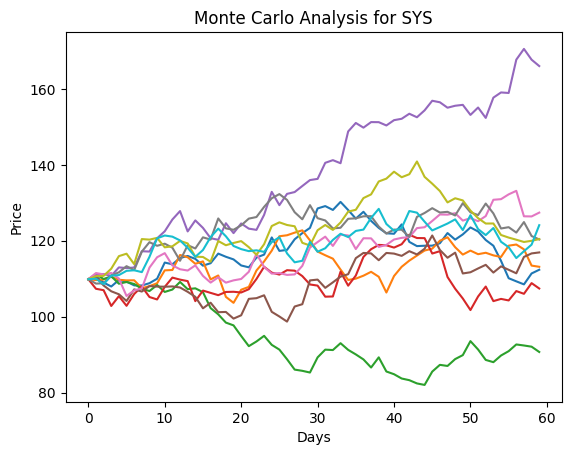

In [30]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price

plt.xlabel('Days') # Assign name to x-axis
plt.ylabel('Price') # Assign name to y-axis
plt.title('Monte Carlo Analysis for SYS') # Assign name to the plot
plt.plot(new_prices)# plot the figure
plt.show()